In [6]:
# Import the data
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import cm
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [7]:
review = pd.read_csv('product_train.csv')
review.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits
3,14369,829,45,NaN,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses
4,505,833,56,NaN,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses



## Task 1: Data Understanding
- Checking & dealing with missing data
- Find out top popular items


In [8]:
# Check missing values
review.isnull().sum()

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64

In [9]:
# checking the size of the data
np.shape(review)

(16440, 11)

In [10]:
# filled the missing value for 'Review_Title' and 'Review_Text'
review['Review_Title'].fillna('Missing title', inplace = True)
review['Review_Text'].fillna('Missing text', inplace = True)
review.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   9
Department                 9
Type                       9
dtype: int64

In [11]:
# checking the shape of the data after fill in the missing value of 'Review_Title' and 'Review_Text'
np.shape(review)

(16440, 11)

In [12]:
# remove missing values
review_clean = review.dropna()
review_clean.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [13]:
# check the shape after droping the missing value
np.shape(review_clean)

(16431, 11)

In [14]:
# see the full information about the dataframe
review_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16431 entries, 0 to 16439
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16431 non-null  int64 
 1   Product_ID               16431 non-null  int64 
 2   Age                      16431 non-null  int64 
 3   Review_Title             16431 non-null  object
 4   Review_Text              16431 non-null  object
 5   Rating                   16431 non-null  int64 
 6   Recommended              16431 non-null  int64 
 7   Positive_Feedback_Count  16431 non-null  int64 
 8   Division                 16431 non-null  object
 9   Department               16431 non-null  object
 10  Type                     16431 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


In [15]:
# see the summary statistics of the dataframe
review_clean.describe()

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000,16431.000000
mean,11706.349705,918.695210,43.196945,4.203274,0.823930,2.564786
std,6769.359603,203.484559,12.274063,1.106311,0.380891,5.911998
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5863.500000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11694.000000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17536.500000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [16]:
# Test data

In [17]:
review_test = pd.read_csv('product_test.csv')
review_test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses
1,11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses


In [18]:
# Check missing values
review_test.isnull().sum()

ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64

In [19]:
# checking the size of the data
np.shape(review_test)

(6803, 10)

In [20]:
# filled the missing value for 'Review_Title'
review_test['Review_Title'].fillna('Missing title', inplace = True)
review_test.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   5
Department                 5
Type                       5
dtype: int64

In [21]:
# check which line of Division has missing value
review_test.loc[review_test['Division'].isnull()]

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
2696,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,NaN,NaN,NaN
4653,16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,NaN,NaN,NaN
6216,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,0,NaN,NaN,NaN
6638,22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,NaN,NaN,NaN
6640,23006,136,33,Cute itsy socks,"Love polkadots, love sparkle. these little soc...",5,0,NaN,NaN,NaN


In [22]:
# fill in the missing value
review_test.loc[2696,['Division', 'Department', 'Type']] = ['Initmates', 'Intimate', 'Legwear']
review_test.loc[4653,['Division', 'Department', 'Type']] = ['Initmates', 'Intimate', 'Legwear']
review_test.loc[6216,['Division', 'Department', 'Type']] = ['General Petite', 'Tops', 'Knits']
review_test.loc[6638,['Division', 'Department', 'Type']] = ['Initmates', 'Intimate', 'Legwear']
review_test.loc[6640,['Division', 'Department', 'Type']] = ['Initmates', 'Intimate', 'Legwear']

In [23]:
review_test.isnull().sum()

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64

In [24]:
np.shape(review_test)

(6803, 10)

In [25]:
# top sell products

best_sell = review_clean.pivot_table(index = ['Product_ID', 'Division', 'Department', 'Type'],
                                    values = ['ID'],
                                    aggfunc = ['count'])
best_sell.sort_values(by = ('count', 'ID'), ascending = False)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

,,,,count
,,,,ID
Product_ID,Division,Department,Type,
1078,General,Dresses,Dresses,431
862,General,Tops,Knits,359
1094,General,Dresses,Dresses,314
1078,General Petite,Dresses,Dresses,287
1081,General Petite,Dresses,Dresses,280
...,...,...,...,...
495,General,Bottoms,Shorts,1
496,General,Bottoms,Shorts,1


In [26]:
# Top five products and their characteristics with average age,positive_feedback_count,rating,recommended,sell_amount
best_sell_char = review_clean.pivot_table(index = ['Product_ID', 'Division', 'Department', 'Type'],
                                    values = ['Age', 'Recommended','Rating', 'Positive_Feedback_Count'],
                                    aggfunc = np.mean)
best_sell_char['Sell_amount'] = best_sell[('count', 'ID')]
best_sell_char.sort_values(by = 'Sell_amount', ascending = False)

,,,,Age,Positive_Feedback_Count,Rating,Recommended,Sell_amount
Product_ID,Division,Department,Type,,,,,
1078,General,Dresses,Dresses,42.334107,2.679814,4.290023,0.863109,431
862,General,Tops,Knits,42.899721,2.203343,4.119777,0.807799,359
1094,General,Dresses,Dresses,40.990446,2.961783,4.308917,0.875796,314
1078,General Petite,Dresses,Dresses,42.839721,3.104530,4.059233,0.756098,287
1081,General Petite,Dresses,Dresses,41.521429,2.989286,4.328571,0.860714,280
...,...,...,...,...,...,...,...,...
495,General,Bottoms,Shorts,39.000000,2.000000,1.000000,0.000000,1
496,General,Bottoms,Shorts,37.000000,0.000000,5.000000,1.000000,1
497,Initmates,Intimate,Lounge,25.000000,2.000000,4.000000,1.000000,1




## EDA
- Recommendation across departments and product types
- Rating patterns across departments and product types
- Buying behavior of different age groups
- Reviewing behavior of different age groups



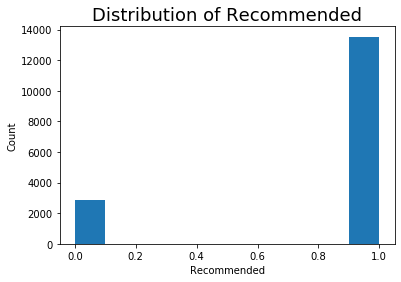

In [27]:
# distribution of the target variable Recommended
plt.hist(review_clean['Recommended'])
plt.title('Distribution of Recommended', fontsize = 18)
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.show()

In [28]:
# count number of customers recommend the products and number of customers not recommend it.
review_clean['Recommended'].value_counts()

1    13538
0     2893
Name: Recommended, dtype: int64

In [29]:
# percentage of recommendation
review_clean['Recommended'].value_counts() / review_clean['Recommended'].count()

NumExpr defaulting to 4 threads.


1    0.82393
0    0.17607
Name: Recommended, dtype: float64

In [30]:
# distribution of the category variables, Division, Department, Type, and their relation with recommended

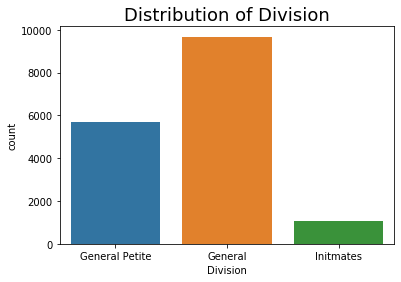

In [31]:
# Division

sns.countplot(review_clean['Division'])
plt.title('Distribution of Division', fontsize = 18)
plt.show()

# https://seaborn.pydata.org/generated/seaborn.countplot.html

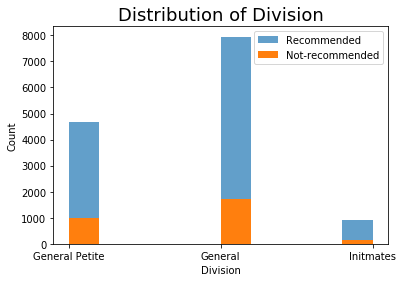

In [32]:
# number of recommended and non-recommended for each division
plt.hist([review_clean[review_clean['Recommended'] == 1]['Division']], alpha = 0.7, label = ['Recommended'])
plt.hist([review_clean[review_clean['Recommended'] == 0]['Division']], label = ['Not-recommended'])
plt.title('Distribution of Division', fontsize = 18)
plt.xlabel('Division')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
pd.crosstab(review_clean['Recommended'],review_clean['Division'])

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Division,General,General Petite,Initmates
Recommended,,,
0,1729,1002,162
1,7948,4678,912


In [34]:
review_clean.groupby('Division').mean()['Recommended']

Division
General           0.821329
General Petite    0.823592
Initmates         0.849162
Name: Recommended, dtype: float64

In [35]:
# Department

review_clean['Department'].value_counts()

Tops        7288
Dresses     4475
Bottoms     2620
Intimate    1235
Jackets      732
Trend         81
Name: Department, dtype: int64

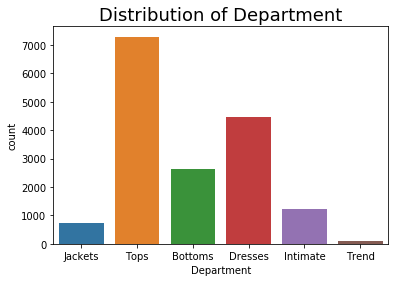

In [36]:
# distribution of department
sns.countplot(review_clean['Department'])
plt.title('Distribution of Department', fontsize = 18)
plt.show()

In [37]:
pd.crosstab(review_clean['Department'],review_clean['Recommended']).sort_values(by = 1, ascending = False)

Recommended,0,1
Department,,
Tops,1325,5963
Dresses,865,3610
Bottoms,381,2239
Intimate,189,1046
Jackets,114,618
Trend,19,62


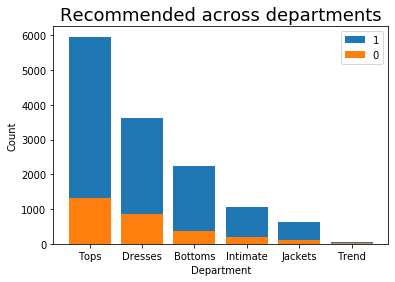

In [38]:
# number of recommended and non-recommended for each department
x_value = pd.crosstab(review_clean['Department'],review_clean['Recommended']).sort_values(by = 1, ascending = False)
plt.bar(x_value.index, x_value[1], label = '1')
plt.bar(x_value.index, x_value[0], label = '0')
plt.title('Recommended across departments', fontsize = 18)
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend()
plt.show()

In [39]:
pd.crosstab(review_clean['Recommended'],review_clean['Department'])

Department,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Recommended,,,,,,
0,381,865,189,114,1325,19
1,2239,3610,1046,618,5963,62


In [40]:
review_clean.groupby('Department').mean()['Recommended'].sort_values()

Department
Trend       0.765432
Dresses     0.806704
Tops        0.818194
Jackets     0.844262
Intimate    0.846964
Bottoms     0.854580
Name: Recommended, dtype: float64

In [41]:
# Type

review_clean['Type'].value_counts()

Dresses           4475
Knits             3393
Blouses           2129
Sweaters          1003
Pants              943
Jeans              801
Fine gauge         763
Skirts             652
Jackets            496
Lounge             493
Swim               249
Outerwear          236
Shorts             223
Sleep              166
Legwear            116
Intimates          107
Layering           103
Trend               81
Casual bottoms       1
Chemises             1
Name: Type, dtype: int64

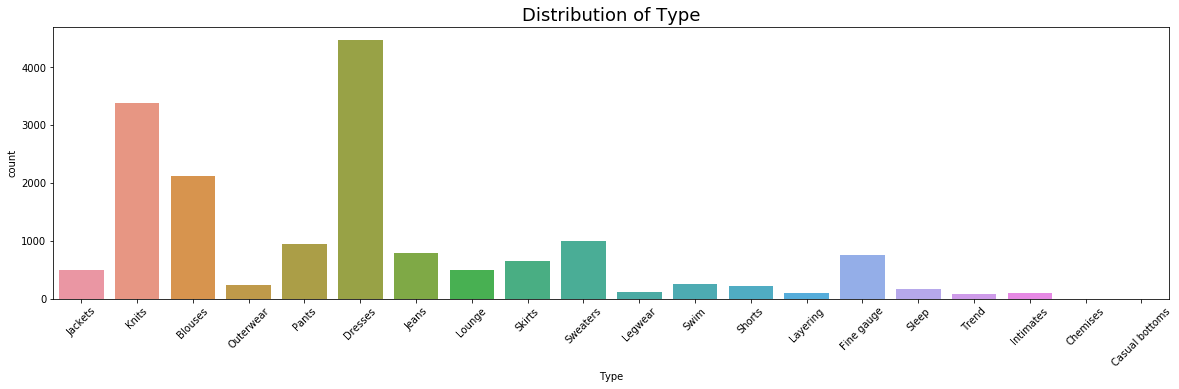

In [42]:
# distribution of type
plt.figure(figsize=(20,5))
sns.countplot(review_clean['Type'])
plt.title('Distribution of Type', fontsize = 18)
plt.xticks(rotation = 45)
figsize=(10,10)
plt.show()

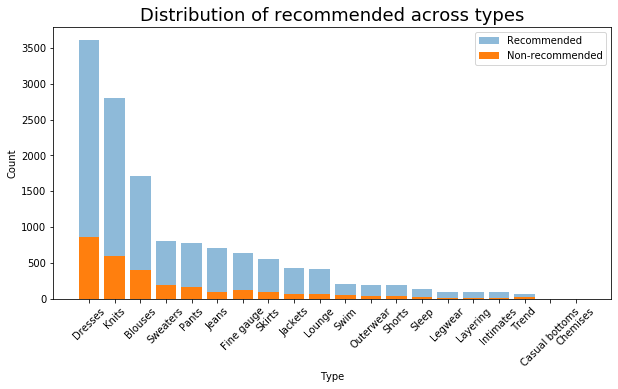

In [43]:
# number of recommended and non-recommended for each Type
x_value = pd.crosstab(review_clean['Type'], review_clean['Recommended']).sort_values(by = 1, ascending = False)

plt.figure(figsize=(10,5))
plt.bar(x_value.index, x_value[1], label = 'Recommended', alpha = 0.5)
plt.bar(x_value.index, x_value[0], label = 'Non-recommended')
plt.title('Distribution of recommended across types', fontsize = 18)
plt.xticks(rotation = 45)
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [44]:
review_clean.groupby('Type').mean()['Recommended'].sort_values()

Type
Trend             0.765432
Swim              0.803213
Sweaters          0.805583
Dresses           0.806704
Blouses           0.807891
Outerwear         0.817797
Knits             0.823460
Pants             0.827147
Shorts            0.838565
Fine gauge        0.840105
Legwear           0.844828
Lounge            0.853955
Sleep             0.855422
Jackets           0.856855
Skirts            0.858896
Intimates         0.859813
Jeans             0.887640
Layering          0.893204
Chemises          1.000000
Casual bottoms    1.000000
Name: Recommended, dtype: float64

In [45]:
# Numerical variables: product_ID,age, rating, positive_feedback_count

In [46]:
review_clean.corr()['Product_ID']['Recommended']

-0.015704831512457076

In [47]:
review_clean.corr()['Age']['Recommended']

0.03477030201888198

In [48]:
review_clean.corr()['Rating']['Recommended']

0.7945696491747295

In [49]:
review_clean.corr()['Positive_Feedback_Count']['Recommended']

-0.06854714330865812

In [50]:
review_clean['Product_ID'].describe()

count    16431.000000
mean       918.695210
std        203.484559
min          0.000000
25%        861.000000
50%        936.000000
75%       1078.000000
max       1205.000000
Name: Product_ID, dtype: float64

In [51]:
# Age

review_clean['Age'].describe()

count    16431.000000
mean        43.196945
std         12.274063
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

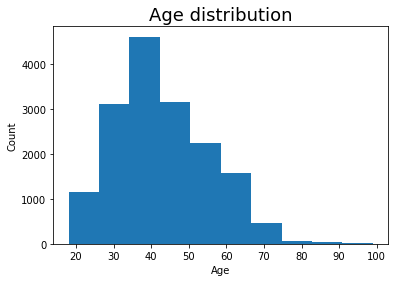

In [52]:
plt.hist(review_clean['Age'])
plt.title('Age distribution', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

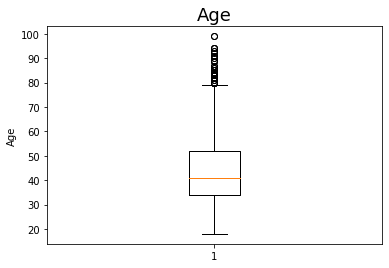

In [53]:
plt.boxplot(review_clean['Age'])
plt.title('Age', fontsize = 18)
plt.ylabel('Age')
plt.show()

In [54]:
# number of outliers in Age, only 77 outliers, so can keep it and it will not have much affect on final results
age_outlier = review_clean[review_clean['Age'] >= 80]
np.shape(age_outlier)

(77, 11)

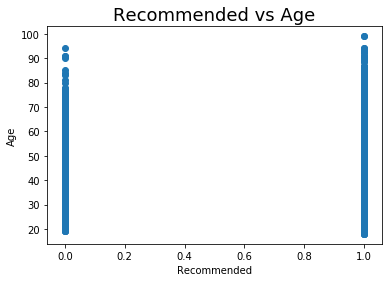

In [55]:
plt.scatter(review_clean['Recommended'], review_clean['Age'])
plt.title('Recommended vs Age', fontsize = 18)
plt.xlabel('Recommended')
plt.ylabel('Age')
plt.show()

In [56]:
# Positive_Feedback_Count

review_clean['Positive_Feedback_Count'].describe()

count    16431.000000
mean         2.564786
std          5.911998
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive_Feedback_Count, dtype: float64

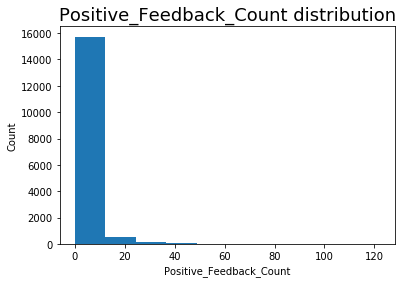

In [57]:
plt.hist(review_clean['Positive_Feedback_Count'])
plt.title('Positive_Feedback_Count distribution', fontsize = 18)
plt.xlabel('Positive_Feedback_Count')
plt.ylabel('Count')
plt.show()

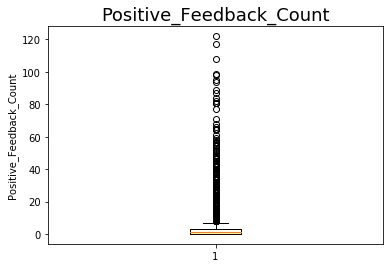

In [58]:
plt.boxplot(review_clean['Positive_Feedback_Count'])
plt.title('Positive_Feedback_Count', fontsize = 18)
plt.ylabel('Positive_Feedback_Count')
plt.show()

In [59]:
# Rating

review_clean['Rating'].describe()

count    16431.000000
mean         4.203274
std          1.106311
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

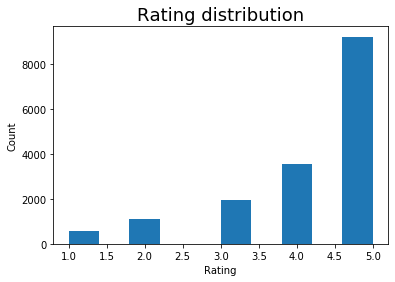

In [60]:
# distribution for rating
plt.hist(review_clean['Rating'])
plt.title('Rating distribution', fontsize = 18)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

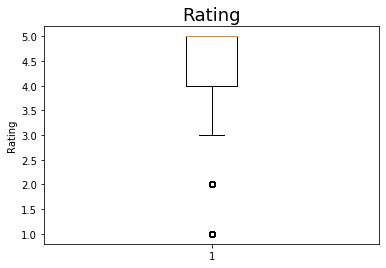

In [61]:
# boxplot for rating, find the outliers in the data
plt.boxplot(review_clean['Rating'])
plt.title('Rating', fontsize = 18)
plt.ylabel('Rating')
plt.show()

In [62]:
# number of outliers for rating
rating_outlier = review_clean[review_clean['Rating'] <= 3]
np.shape(rating_outlier)

(3641, 11)

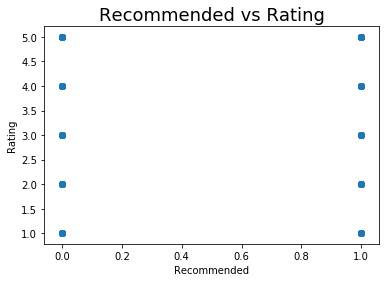

In [63]:
# scatter plot for rating, check the relation between rating and recommended
plt.scatter(review_clean['Recommended'], review_clean['Rating'])
plt.title('Recommended vs Rating', fontsize = 18)
plt.xlabel('Recommended')
plt.ylabel('Rating')
plt.show()

In [64]:
review_clean['Rating'].value_counts()

5    9233
4    3557
3    1968
2    1094
1     579
Name: Rating, dtype: int64

In [65]:
pd.crosstab(review_clean['Recommended'],review_clean['Rating'])

Rating,1,2,3,4,5
Recommended,,,,,
0,568,1029,1166,115,15
1,11,65,802,3442,9218


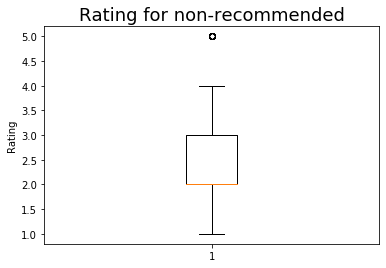

In [66]:
# boxplot for rating with recommended = 0
plt.boxplot([review_clean[review_clean['Recommended'] == 0]['Rating']])
plt.title('Rating for non-recommended', fontsize = 18)
plt.ylabel('Rating')
plt.show()

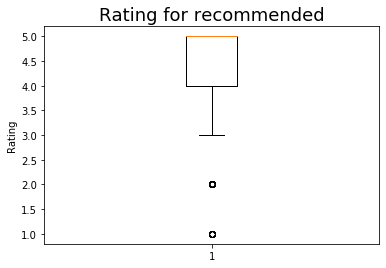

In [67]:
# boxplot for rating with recommended = 1
plt.boxplot([review_clean[review_clean['Recommended'] == 1]['Rating']])
plt.title('Rating for recommended', fontsize = 18)
plt.ylabel('Rating')
plt.show()

In [68]:
# drop the outliers in recommended and nonrecommended data seperately and combine the dataset
without_nr = review_clean[(review_clean['Recommended'] == 0) & (review_clean['Rating'] <= 4)]
without_r = review_clean[(review_clean['Recommended'] == 1) & (review_clean['Rating'] >= 3)]
review_train = pd.concat([without_nr, without_r])
review_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
5,19166,1121,25,"Beautiful design, poor execution",I knew i needed to buy this trench from the mo...,1,0,4,General,Jackets,Outerwear
10,19003,1052,42,Boxy,Great color and quality but very boxy. even wi...,3,0,0,General Petite,Bottoms,Pants
12,4282,1081,53,Neckline bothers me,I like the fabric - very smooth and feels nice...,3,0,28,General,Dresses,Dresses
14,23287,823,45,"Too much fabric, shoulders won't stay down","This is a gorgeous print, but i found it too f...",2,0,0,General,Tops,Blouses
25,20217,1078,48,"Cute, but...","Wanted to love this dress, bit it wasn't to be...",2,0,0,General,Dresses,Dresses


In [69]:
# shape of the final dataset after dealing with the outliers and missing values
np.shape(review_train)

(16340, 11)

In [70]:
# rating patterns across departments and types

pd.crosstab(review_train['Department'],review_train['Rating'])

Rating,1,2,3,4,5
Department,,,,,
Bottoms,70,129,293,558,1556
Dresses,165,308,578,988,2414
Intimate,42,66,126,264,731
Jackets,36,39,55,147,451
Tops,250,481,902,1579,4032
Trend,5,6,14,21,34


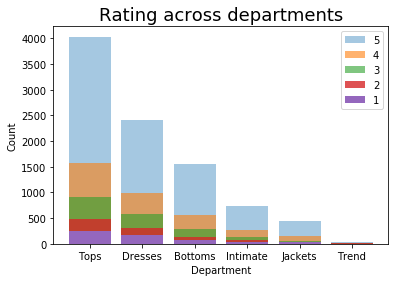

In [71]:
# distribution of rating across departments
x_value = pd.crosstab(review_train['Department'],review_train['Rating']).sort_values(by = 5, ascending = False)
plt.bar(x_value.index, x_value[5], label = '5', alpha = 0.4)
plt.bar(x_value.index, x_value[4], label = '4', alpha = 0.6)
plt.bar(x_value.index, x_value[3], label = '3', alpha = 0.6)
plt.bar(x_value.index, x_value[2], label = '2', alpha = 0.8)
plt.bar(x_value.index, x_value[1], label = '1')
plt.title('Rating across departments', fontsize = 18)
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend()
plt.show()

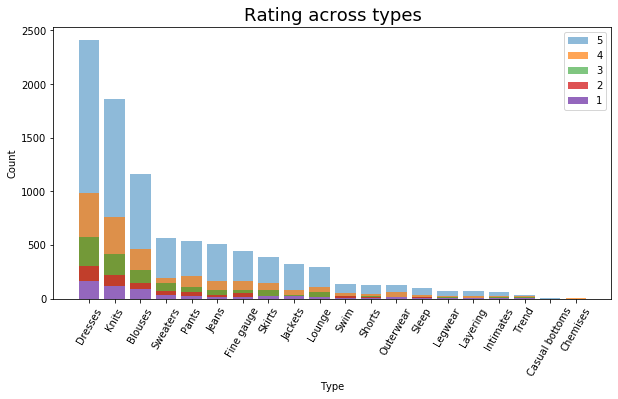

In [72]:
# distribution of rating across types
x_value = pd.crosstab(review_train['Type'],review_train['Rating']).sort_values(by = 5, ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x_value.index, x_value[5], label = '5', alpha = 0.5)
plt.bar(x_value.index, x_value[4], label = '4', alpha = 0.7)
plt.bar(x_value.index, x_value[3], label = '3', alpha = 0.6)
plt.bar(x_value.index, x_value[2], label = '2', alpha = 0.8)
plt.bar(x_value.index, x_value[1], label = '1')
plt.title('Rating across types', fontsize = 18)
plt.xticks(rotation = 60)
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [73]:
# reviewing and buying behaviour for different age group

In [74]:
review_train['Age'].describe()

count    16340.000000
mean        43.185496
std         12.272332
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

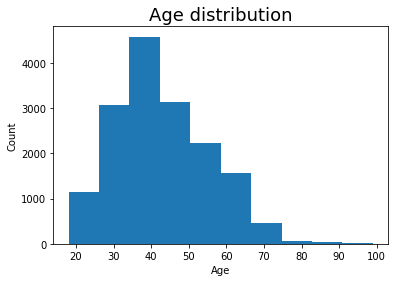

In [75]:
# distribution of age
plt.hist(review_train['Age'])
plt.title('Age distribution', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [76]:
# Buying and reviewing behaviour for different age groups
# create a new dataset with the data from original dataset and add a new column: age interval

age_interval = [10, 20, 30, 40, 50, 60, 70, 80, 100]
customers_beh = review_train[['ID', 'Product_ID', 'Age', 'Review_Text', 'Department']]
customers_beh['Age_interval'] = pd.cut(customers_beh['Age'], age_interval).astype(str)
customers_beh.head()

,ID,Product_ID,Age,Review_Text,Department,Age_interval
5,19166,1121,25,I knew i needed to buy this trench from the mo...,Jackets,"(20, 30]"
10,19003,1052,42,Great color and quality but very boxy. even wi...,Bottoms,"(40, 50]"
12,4282,1081,53,I like the fabric - very smooth and feels nice...,Dresses,"(50, 60]"
14,23287,823,45,"This is a gorgeous print, but i found it too f...",Tops,"(40, 50]"
25,20217,1078,48,"Wanted to love this dress, bit it wasn't to be...",Dresses,"(40, 50]"


In [77]:
customers_beh['Department'].value_counts()

Tops        7244
Dresses     4453
Bottoms     2606
Intimate    1229
Jackets      728
Trend         80
Name: Department, dtype: int64

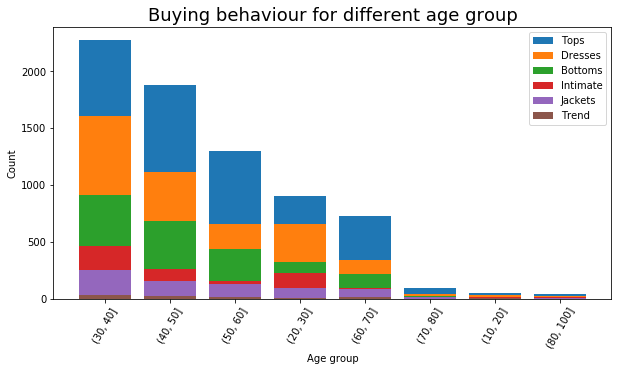

In [78]:
# distribution of age group across departments
x_value = pd.crosstab(customers_beh['Age_interval'],customers_beh['Department']).sort_values(
    by = 'Tops', ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x_value.index, x_value['Tops'], label = 'Tops')
plt.bar(x_value.index, x_value['Dresses'], label = 'Dresses')
plt.bar(x_value.index, x_value['Bottoms'], label = 'Bottoms')
plt.bar(x_value.index, x_value['Intimate'], label = 'Intimate')
plt.bar(x_value.index, x_value['Jackets'], label = 'Jackets')
plt.bar(x_value.index, x_value['Trend'], label = 'Trend')
plt.title('Buying behaviour for different age group', fontsize = 18)
plt.xticks(rotation = 60)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend()
plt.show()

In [79]:
# Text variables: Review_Title, Review_Text

from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse import hstack

In [80]:
# relationship between review length and recommended
text_var = review_train[['Review_Title','Review_Text', 'Recommended']]
text_var['Title_len'] = text_var['Review_Title'].str.split(" ").str.len()
text_var['Text_len'] = text_var['Review_Text'].str.split(" ").str.len()

In [81]:
text_var.corr()['Title_len']['Recommended']

-0.08709284550360559

In [82]:
text_var.corr()['Text_len']['Recommended']

-0.05087410125017878

In [83]:
import pip
pip.main(['install','vaderSentiment'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [85]:
# find out the score for each review_text

analyzer = SentimentIntensityAnalyzer()
score_result = []
for sentence in review_train['Review_Text']:
    vs = analyzer.polarity_scores(sentence)
    score_result.append(vs)
    
score_result

# https://github.com/cjhutto/vaderSentiment

[{'neg': 0.027, 'neu': 0.848, 'pos': 0.125, 'compound': 0.8807},
 {'neg': 0.131, 'neu': 0.749, 'pos': 0.119, 'compound': -0.0644},
 {'neg': 0.073, 'neu': 0.807, 'pos': 0.12, 'compound': 0.6204},
 {'neg': 0.076, 'neu': 0.794, 'pos': 0.129, 'compound': 0.3919},
 {'neg': 0.116, 'neu': 0.67, 'pos': 0.214, 'compound': 0.5826},
 {'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.9333},
 {'neg': 0.093, 'neu': 0.654, 'pos': 0.253, 'compound': 0.7647},
 {'neg': 0.033, 'neu': 0.846, 'pos': 0.121, 'compound': 0.6829},
 {'neg': 0.039, 'neu': 0.716, 'pos': 0.245, 'compound': 0.9819},
 {'neg': 0.082, 'neu': 0.754, 'pos': 0.164, 'compound': 0.6894},
 {'neg': 0.031, 'neu': 0.895, 'pos': 0.075, 'compound': 0.6119},
 {'neg': 0.03, 'neu': 0.888, 'pos': 0.082, 'compound': 0.5574},
 {'neg': 0.014, 'neu': 0.939, 'pos': 0.047, 'compound': 0.51},
 {'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.973},
 {'neg': 0.051, 'neu': 0.809, 'pos': 0.14, 'compound': 0.6494},
 {'neg': 0.185, 'neu': 0.67, 'pos'

In [86]:
# find out the max(neg, neu, pos, compound) for each review
import operator
review_score = []
for i in range(len(score_result)):
    review_score.append(max(score_result[i].items(), key=operator.itemgetter(1))[0])
    
review_score

# https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary

['compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'compound',
 'compound',
 'compound',
 'compound',
 'compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'compound',
 'neu',
 'compound',
 'neu',
 'compound',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'neg',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'compound',
 'compound',
 'compound',
 'neu',
 'compound',
 'neu',
 'neu',
 'compound',
 'neg',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'neu',
 'compound',
 'neu',
 'neu',
 'compound',
 'neu',
 'compound',
 'neu',
 'neu',
 'comp

In [87]:
# count number of each unique value and convert the list to a series
rtext_score = pd.Series(review_score)
rtext_score.value_counts()

compound    10787
neu          4943
neg           599
pos            11
dtype: int64

In [88]:
# add the new series and the series recommended in the review_train to the created dataset for the following analysis
customers_beh['rtext_score'] = rtext_score
customers_beh['Recommended'] = review_train['Recommended']
customers_beh.head()

,ID,Product_ID,Age,Review_Text,Department,Age_interval,rtext_score,Recommended
5,19166,1121,25,I knew i needed to buy this trench from the mo...,Jackets,"(20, 30]",neu,0
10,19003,1052,42,Great color and quality but very boxy. even wi...,Bottoms,"(40, 50]",neu,0
12,4282,1081,53,I like the fabric - very smooth and feels nice...,Dresses,"(50, 60]",neu,0
14,23287,823,45,"This is a gorgeous print, but i found it too f...",Tops,"(40, 50]",neu,0
25,20217,1078,48,"Wanted to love this dress, bit it wasn't to be...",Dresses,"(40, 50]",compound,0


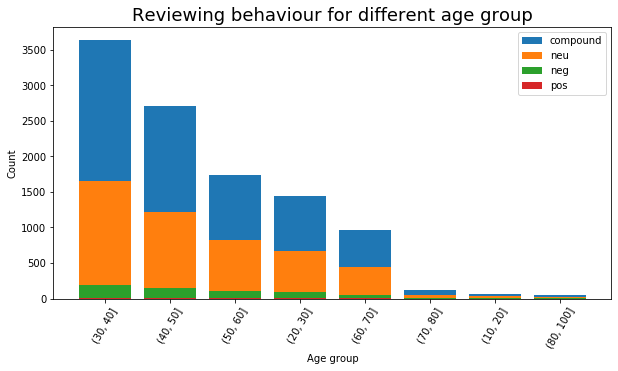

In [89]:
# distribution of age group across review
x_value = pd.crosstab(customers_beh['Age_interval'],customers_beh['rtext_score']).sort_values(
    by = 'compound', ascending = False)
plt.figure(figsize=(10,5))
plt.bar(x_value.index, x_value['compound'], label = 'compound')
plt.bar(x_value.index, x_value['neu'], label = 'neu')
plt.bar(x_value.index, x_value['neg'], label = 'neg')
plt.bar(x_value.index, x_value['pos'], label = 'pos')
plt.title('Reviewing behaviour for different age group', fontsize = 18)
plt.xticks(rotation = 60)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend()
plt.show()

In [90]:
# check the compound, neg, neu, pos value for recommended and non-recommended seperately
pd.crosstab(customers_beh['Recommended'],customers_beh['rtext_score'])

rtext_score,compound,neg,neu,pos
Recommended,,,,
0,1884,109,868,2
1,8834,490,4044,9


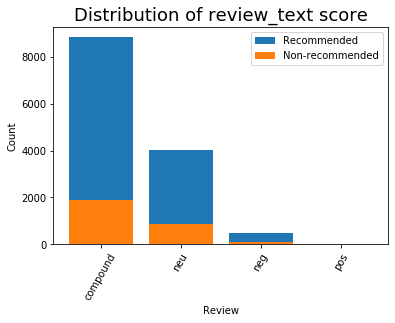

In [91]:
# distribution of review for recommended and nonrecommended
x_value = pd.crosstab(customers_beh['rtext_score'],customers_beh['Recommended']).sort_values(by = 1, ascending = False)
plt.bar(x_value.index, x_value[1], label = 'Recommended')
plt.bar(x_value.index, x_value[0], label = 'Non-recommended')
plt.title('Distribution of review_text score', fontsize = 18)
plt.xticks(rotation = 60)
plt.xlabel('Review')
plt.ylabel('Count')
plt.legend()
plt.show()


## Task 2: Building a benchmark model to predict recommendation
- Data Preparation
- Model Validation
- Findings Discussion


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

corpus=list(review_train['Review_Text'])

count_vectorizer = CountVectorizer(max_features = 500)

count_train = count_vectorizer.fit_transform(corpus).toarray()
count_test = count_vectorizer.transform(list(review_test['Review_Text'])).toarray()

print(count_train.shape)
print(count_test.shape)

(16340, 500)
(6803, 500)


In [93]:
X_count_train = pd.DataFrame(count_train, columns = count_vectorizer.get_feature_names())
Y_train = review_train['Recommended']

In [94]:
X_count_test = pd.DataFrame(count_test, columns = count_vectorizer.get_feature_names())

In [95]:
print('train_set size:',X_count_train.shape)
print('test_set size:',X_count_test.shape)

train_set size: (16340, 500)
test_set size: (6803, 500)


In [96]:
from sklearn.linear_model import LogisticRegression

benchmark_LR = LogisticRegression(solver='liblinear')

In [97]:
from sklearn.model_selection import cross_validate
benchmark_cv_results = cross_validate(benchmark_LR,
                                     X_count_train,
                                     Y_train,
                                     scoring = ['f1', 'accuracy', 'precision', 'recall', 'roc_auc'],
                                     cv = 5,
                                     n_jobs = -1,
                                     return_train_score = True)

In [98]:
benchmark_cv_results

{'fit_time': array([2.74874806, 2.43508768, 2.23359609, 2.24976683, 0.8133409 ]),
 'score_time': array([0.21139717, 0.22823095, 0.1525569 , 0.15046191, 0.04685307]),
 'test_f1': array([0.93311523, 0.93343007, 0.93439942, 0.92925638, 0.93369863]),
 'train_f1': array([0.94129417, 0.9425559 , 0.94086095, 0.94190381, 0.94099478]),
 'test_accuracy': array([0.8873929 , 0.8876989 , 0.88953488, 0.88035496, 0.88892289]),
 'train_accuracy': array([0.90123929, 0.90330477, 0.9004743 , 0.90223378, 0.90062729]),
 'test_precision': array([0.91352313, 0.91208791, 0.91462113, 0.90613973, 0.91876348]),
 'train_precision': array([0.92237768, 0.92309062, 0.92163149, 0.9226111 , 0.92103859]),
 'test_recall': array([0.95356612, 0.95579495, 0.95505201, 0.95358336, 0.94912737]),
 'train_recall': array([0.96100279, 0.9628598 , 0.96090994, 0.96202061, 0.9618349 ]),
 'test_roc_auc': array([0.91151315, 0.91243119, 0.91473837, 0.90206235, 0.89868193]),
 'train_roc_auc': array([0.93742259, 0.93613399, 0.93529106, 0

In [99]:
pd.DataFrame.from_dict(benchmark_cv_results)

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,2.748748,0.211397,0.933115,0.941294,0.887393,0.901239,0.913523,0.922378,0.953566,0.961003,0.911513,0.937423
1,2.435088,0.228231,0.933430,0.942556,0.887699,0.903305,0.912088,0.923091,0.955795,0.962860,0.912431,0.936134
2,2.233596,0.152557,0.934399,0.940861,0.889535,0.900474,0.914621,0.921631,0.955052,0.960910,0.914738,0.935291
3,2.249767,0.150462,0.929256,0.941904,0.880355,0.902234,0.906140,0.922611,0.953583,0.962021,0.902062,0.938082
4,0.813341,0.046853,0.933699,0.940995,0.888923,0.900627,0.918763,0.921039,0.949127,0.961835,0.898682,0.939056


In [100]:
pd.DataFrame.from_dict(benchmark_cv_results).mean()

fit_time           2.096108
score_time         0.157900
test_f1            0.932780
train_f1           0.941522
test_accuracy      0.886781
train_accuracy     0.901576
test_precision     0.913027
train_precision    0.922150
test_recall        0.953425
train_recall       0.961726
test_roc_auc       0.907885
train_roc_auc      0.937197
dtype: float64



## Task 3: Improving Benchmark Model
- Add New Feature
- Dummy Variable Encoding
- Log Transformation
- Feature Scaling
- TF-IDF
- Validate Model and Optimize Hyperparameters
- Evaluate Results

In [101]:
review_improve_clean = review_train.copy()
review_improve_test = review_test.copy()

print(review_improve_clean.shape)
print(review_improve_test.shape)

(16340, 11)
(6803, 10)


In [102]:
review_improve_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16340 entries, 5 to 16439
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       16340 non-null  int64 
 1   Product_ID               16340 non-null  int64 
 2   Age                      16340 non-null  int64 
 3   Review_Title             16340 non-null  object
 4   Review_Text              16340 non-null  object
 5   Rating                   16340 non-null  int64 
 6   Recommended              16340 non-null  int64 
 7   Positive_Feedback_Count  16340 non-null  int64 
 8   Division                 16340 non-null  object
 9   Department               16340 non-null  object
 10  Type                     16340 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


In [103]:
#Number of capital letter
review_improve_clean['Capital_No'] = review_improve_clean['Review_Text'].copy().apply(lambda t:len([x for x in t.split() if x.isupper()]))

#Count of positive words
import re
count_new = []
for i in review_improve_clean['Review_Text']:
    result_new = re.findall(r'(good|fit|gorgeous|nice|perfect|amazing|great)', i)
    count_review = len(result_new)
    count_new.append(count_review)
review_improve_clean['Good_comments'] = count_new

In [104]:
#Number of capital letter
review_improve_test['Capital_No'] = review_improve_test['Review_Text'].copy().apply(lambda t:len([x for x in t.split() if x.isupper()]))

#Count of positive words
import re
count_new_test = []
for i in review_improve_test['Review_Text']:
    result_test = re.findall(r'(good|fit|gorgeous|nice|perfect|amazing|great)', i)
    count_review_test = len(result_test)
    count_new_test.append(count_review_test)
review_improve_test['Good_comments'] = count_new_test

In [105]:
redefined_train = review_improve_clean.drop(['ID','Review_Title','Review_Text','Recommended'],axis = 1)
redefined_test = review_improve_test.drop(['ID','Review_Title','Review_Text'],axis = 1)

print(redefined_train.shape)
print(redefined_test.shape)

(16340, 9)
(6803, 9)


In [106]:
redefined_train_dummy = pd.get_dummies(redefined_train, drop_first = True)
redefined_test_dummy = pd.get_dummies(redefined_test, drop_first = True)

print(redefined_train_dummy.shape)
print(redefined_test_dummy.shape)

(16340, 32)
(6803, 31)


In [107]:
train_delete = []
for i in redefined_train_dummy.columns:
    if i not in redefined_test_dummy.columns:
        train_delete.append(i)
train_delete

['Type_Chemises']

In [108]:
redefined_train_dummy = redefined_train_dummy.drop('Type_Chemises',axis=1)

In [109]:
print(redefined_train_dummy.shape)
print(redefined_test_dummy.shape)

(16340, 31)
(6803, 31)


In [110]:
redefined_train_dummy.columns

Index(['Product_ID', 'Age', 'Rating', 'Positive_Feedback_Count', 'Capital_No',
       'Good_comments', 'Division_General Petite', 'Division_Initmates',
       'Department_Dresses', 'Department_Intimate', 'Department_Jackets',
       'Department_Tops', 'Department_Trend', 'Type_Casual bottoms',
       'Type_Dresses', 'Type_Fine gauge', 'Type_Intimates', 'Type_Jackets',
       'Type_Jeans', 'Type_Knits', 'Type_Layering', 'Type_Legwear',
       'Type_Lounge', 'Type_Outerwear', 'Type_Pants', 'Type_Shorts',
       'Type_Skirts', 'Type_Sleep', 'Type_Sweaters', 'Type_Swim',
       'Type_Trend'],
      dtype='object')

In [111]:
descriptive = redefined_train.describe()
descriptive.loc['skew', :] = review_improve_clean.skew()
descriptive.loc['kurt', :] = review_improve_clean.kurt()
descriptive.round(3)

,Product_ID,Age,Rating,Positive_Feedback_Count,Capital_No,Good_comments
count,16340.000,16340.000,16340.000,16340.000,16340.000,16340.000
mean,918.740,43.185,4.213,2.562,0.375,1.293
std,203.469,12.272,1.097,5.911,0.484,1.274
min,0.000,18.000,1.000,0.000,0.000,0.000
25%,861.000,34.000,4.000,0.000,0.000,0.000
50%,936.000,41.000,5.000,1.000,0.000,1.000
75%,1078.000,52.000,5.000,3.000,1.000,2.000
max,1205.000,99.000,5.000,122.000,1.000,10.000
skew,-2.090,0.534,-1.347,6.859,0.517,1.042
kurt,5.196,-0.076,0.931,78.215,-1.733,1.115


In [112]:
for i in ['Age','Positive_Feedback_Count','Capital_No','Good_comments']:
    redefined_train[i] = np.log1p(redefined_train[i])
    redefined_test[i] = np.log1p(redefined_test[i])

In [113]:
for i in ['Age','Rating','Positive_Feedback_Count','Capital_No','Good_comments']:
    redefined_train_dummy[i] = (redefined_train_dummy[i] - redefined_train_dummy[i].min())/(redefined_train_dummy[i].max()-redefined_train_dummy[i].min())
    redefined_test_dummy[i] = (redefined_test_dummy[i] - redefined_test_dummy[i].min())/(redefined_test_dummy[i].max()-redefined_test_dummy[i].min())

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus=list(review_improve_clean['Review_Text'])

tfidf_vectorizer = TfidfVectorizer(max_features=2000,analyzer = 'word',stop_words="english",ngram_range=(1,3),max_df=0.9,min_df=3)
#max_df:The highest proportion of words
#min_df:the min count of words
train_tfidf_improve = tfidf_vectorizer.fit_transform(corpus).toarray()
test_tfidf_improve = tfidf_vectorizer.transform(list(review_improve_test['Review_Text'])).toarray()

print(train_tfidf_improve.shape)
print(test_tfidf_improve.shape)

(16340, 2000)
(6803, 2000)


In [115]:
X_tfidf_train = pd.DataFrame(train_tfidf_improve,columns = tfidf_vectorizer.get_feature_names(),index = redefined_train_dummy.index)
print(X_tfidf_train.shape)
#x
X_tfidf_train_improve = pd.concat([X_tfidf_train,redefined_train_dummy],axis = 1,ignore_index=False,verify_integrity = True)
#y
y_tfidf_train_improve = review_improve_clean['Recommended']
print(X_tfidf_train_improve.shape)

(16340, 2000)
(16340, 2031)


In [116]:
X_tfidf_test = pd.DataFrame(test_tfidf_improve,columns = tfidf_vectorizer.get_feature_names(),index = redefined_test_dummy.index)
print(X_tfidf_test.shape)
#x
X_tfidf_test_improve = pd.concat([X_tfidf_test,redefined_test_dummy],axis = 1,ignore_index=False,verify_integrity = True)

print(X_tfidf_test_improve.shape)

(6803, 2000)
(6803, 2031)


In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
%%time
adjusted_parameters=[{'penalty':['l1','l2'],
                     'C':[0.01,0.1,0.2,0.5,1,2,5,10,20,50,100],
                     'solver':['liblinear','saga'],
                     'multi_class':['ovr']},
                    {'penalty':['l2'],
                     'C':[0.01,0.1,0.2,0.5,1,2,5,10,20,50,100],
                     'solver':['lbfgs'],
                     'multi_class':['ovr','multinomial']}]

improve_grid=GridSearchCV(LogisticRegression(tol=1e-6,random_state=1,class_weight='balanced'),
                         adjusted_parameters,cv=5,n_jobs=-1,scoring='f1')

improve_fit = improve_grid.fit(X_tfidf_train_improve, y_tfidf_train_improve)

print('Best parameters set:',improve_fit.best_params_)

Best parameters set: {'C': 5, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 6.93 s, sys: 9.36 s, total: 16.3 s
Wall time: 59min 7s


In [119]:
improve_gridcv = improve_fit.best_estimator_

In [120]:
from sklearn.model_selection import cross_val_score
score=np.mean(cross_val_score(improve_gridcv,X_tfidf_train_improve,y_tfidf_train_improve,cv=5,scoring='f1'))
print('logitcv_f1 score:{0}'.format(score))

logitcv_f1 score:0.9658370958274318


In [121]:
from sklearn.model_selection import cross_validate
improve_cv_results = cross_validate(improve_gridcv,
                                     X_tfidf_train_improve,
                                     y_tfidf_train_improve,
                                     scoring=['f1', 'accuracy','precision','recall','roc_auc'],
                                     cv=5,
                                     n_jobs=-1,
                                     return_train_score=True)

In [122]:
improve_cv_results

{'fit_time': array([9.03893876, 9.10790396, 9.01664615, 9.01230383, 1.85282898]),
 'score_time': array([0.31069613, 0.28429484, 0.30740499, 0.31985712, 0.12851906]),
 'test_f1': array([0.96438774, 0.96883853, 0.96516471, 0.96807104, 0.96272347]),
 'train_f1': array([0.9784493 , 0.97735027, 0.97681476, 0.97672214, 0.97797357]),
 'test_accuracy': array([0.94277846, 0.9495104 , 0.94369645, 0.94828641, 0.94002448]),
 'train_accuracy': array([0.96519278, 0.96343329, 0.9625918 , 0.9624388 , 0.96442778]),
 'test_precision': array([0.989449  , 0.98540146, 0.98416988, 0.98538462, 0.98674464]),
 'train_precision': array([0.99864643, 0.99796787, 0.9980622 , 0.99777218, 0.99816283]),
 'test_recall': array([0.94056464, 0.95282318, 0.94687964, 0.95135537, 0.93984404]),
 'train_recall': array([0.95905292, 0.95756732, 0.95645311, 0.95654193, 0.95858483]),
 'test_roc_auc': array([0.98444917, 0.98720295, 0.98554617, 0.98634657, 0.98272429]),
 'train_roc_auc': array([0.99663665, 0.99659176, 0.99662471, 0

In [123]:
pd.DataFrame.from_dict(improve_cv_results)

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,9.038939,0.310696,0.964388,0.978449,0.942778,0.965193,0.989449,0.998646,0.940565,0.959053,0.984449,0.996637
1,9.107904,0.284295,0.968839,0.977350,0.949510,0.963433,0.985401,0.997968,0.952823,0.957567,0.987203,0.996592
2,9.016646,0.307405,0.965165,0.976815,0.943696,0.962592,0.984170,0.998062,0.946880,0.956453,0.985546,0.996625
3,9.012304,0.319857,0.968071,0.976722,0.948286,0.962439,0.985385,0.997772,0.951355,0.956542,0.986347,0.996545
4,1.852829,0.128519,0.962723,0.977974,0.940024,0.964428,0.986745,0.998163,0.939844,0.958585,0.982724,0.996981


In [124]:
pd.DataFrame.from_dict(improve_cv_results).mean()

fit_time           7.605724
score_time         0.270154
test_f1            0.965837
train_f1           0.977462
test_accuracy      0.944859
train_accuracy     0.963617
test_precision     0.986230
train_precision    0.998122
test_recall        0.946293
train_recall       0.957640
test_roc_auc       0.985254
train_roc_auc      0.996676
dtype: float64





## Task 4: Interpret the Results


In [125]:
coef_results = pd.Series(improve_gridcv.coef_.ravel(),index = X_tfidf_train_improve.columns).sort_values(ascending=True,inplace=False)
coef_results

runs small      -4.426927
disappointed    -4.298559
asymmetrical    -3.920873
returned        -3.763600
upper           -3.537687
                  ...    
medium           3.227316
really like      3.465770
slightly         3.870011
unique           4.229085
Rating          16.060119
Length: 2031, dtype: float64

In [126]:
top_20 = coef_results[:10].append(coef_results[-10:])
top_20

runs small       -4.426927
disappointed     -4.298559
asymmetrical     -3.920873
returned         -3.763600
upper            -3.537687
fabric nice      -3.526539
ordered usual    -3.456510
fit              -3.431477
pocket           -3.384212
lay              -3.331501
different         3.005445
just like         3.065178
casual            3.096481
runs large        3.123823
order             3.134182
medium            3.227316
really like       3.465770
slightly          3.870011
unique            4.229085
Rating           16.060119
dtype: float64

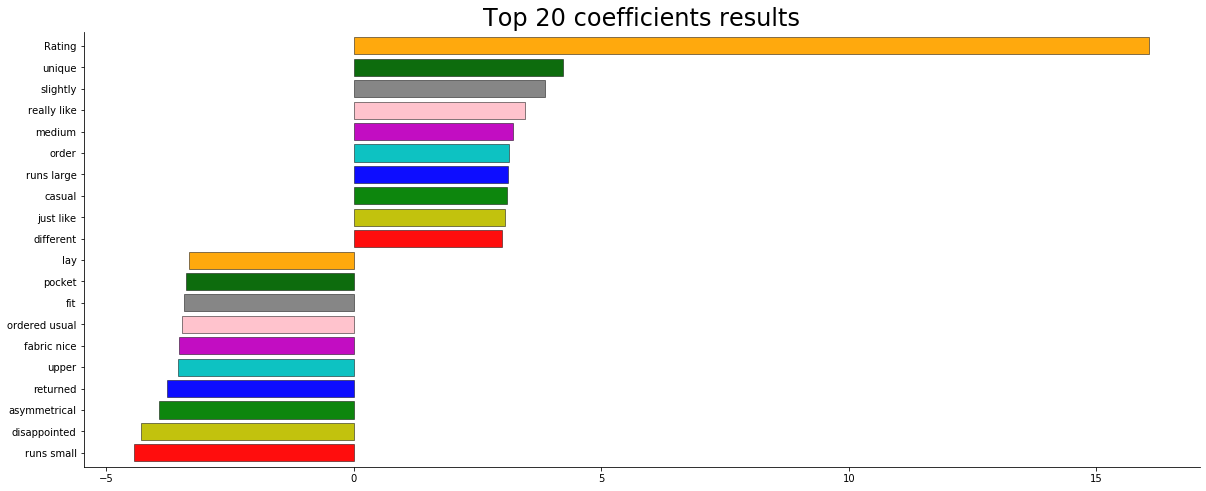

In [127]:
fig, ax = plt.subplots(figsize = (20,8))
top_20.plot(kind='barh',color=['r','y','g','b','c','m','pink','grey','darkgreen','orange'], edgecolor='black',width=0.8,linewidth=0.5,alpha=0.95, ax=ax)
ax.set_title('Top 20 coefficients results',fontsize=24)
sns.despine()
plt.show()

In [128]:
Type_category = []
Department_category = [] 
Division_category = []
for i in X_tfidf_train_improve.columns:
    if 'Type' in i.split('_'):
        Type_category.append(i)
    elif 'Department' in i.split('_'):
        Department_category.append(i)
    elif 'Division' in i.split('_'):
        Division_category.append(i)
print(Type_category)
print(Department_category)
print(Division_category)

['Type_Casual bottoms', 'Type_Dresses', 'Type_Fine gauge', 'Type_Intimates', 'Type_Jackets', 'Type_Jeans', 'Type_Knits', 'Type_Layering', 'Type_Legwear', 'Type_Lounge', 'Type_Outerwear', 'Type_Pants', 'Type_Shorts', 'Type_Skirts', 'Type_Sleep', 'Type_Sweaters', 'Type_Swim', 'Type_Trend']
['Department_Dresses', 'Department_Intimate', 'Department_Jackets', 'Department_Tops', 'Department_Trend']
['Division_General Petite', 'Division_Initmates']


In [129]:
type_results = coef_results.loc[Type_category].sort_values()
type_results

Type_Pants            -1.416607
Type_Shorts           -0.959315
Type_Skirts           -0.840092
Type_Outerwear        -0.637891
Type_Trend            -0.566368
Type_Jeans            -0.510023
Type_Layering         -0.486835
Type_Dresses          -0.467131
Type_Swim             -0.448579
Type_Sleep            -0.422305
Type_Lounge           -0.256884
Type_Jackets          -0.072704
Type_Intimates        -0.060006
Type_Sweaters         -0.005368
Type_Casual bottoms    0.001168
Type_Knits             0.077686
Type_Fine gauge        0.254906
Type_Legwear           0.274661
dtype: float64

In [131]:
type_results = coef_results.loc[Department_category].sort_values()
type_results

Department_Intimate   -1.388815
Department_Tops       -1.048367
Department_Jackets    -0.710595
Department_Trend      -0.566368
Department_Dresses    -0.467131
dtype: float64

In [132]:
type_results = coef_results.loc[Division_category].sort_values()
type_results

Division_General Petite   -0.058870
Division_Initmates         0.643807
dtype: float64

In [133]:
coef_results['Age']

1.0757866797625404






## Task 5: Final Test Resulta

In [134]:
y_prediction=improve_gridcv.predict(X_tfidf_test_improve)
result = pd.DataFrame(np.c_[review_test['ID'].values,y_prediction],columns=['ID','Recommended'])
result

,ID,Recommended
0,10,0
1,11,1
2,13,1
3,19,1
4,24,1
...,...,...
6798,23462,0
6799,23463,1
6800,23465,1
6801,23479,1


In [135]:
y_prediction=improve_gridcv.predict(X_tfidf_test_improve)
result = pd.DataFrame(np.c_[review_test['ID'].values,y_prediction],columns=['ID','Recommended'])
result.to_csv('Group249_Test_Results.csv',index=False)

In [136]:
result['Recommended'].value_counts()

1    5271
0    1532
Name: Recommended, dtype: int64